In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from pitseg.pitseg import load_model, Segmentor
#from thyseg.thyseg import load_model, Segmentor
import nibabel as nib
from tools.utils import show_mask
import pandas as pd
import os
from tqdm import tqdm
from skimage.filters import threshold_otsu

# Pituitary gland segmentation

## New model for pituitary gland segmentation

In [5]:
ckpt = '../pitseg/checkpoint/pitseg_0.3.7.pt'
model = load_model(ckpt)
path = '../data/pituitary/kopf_SHIP/SHIP_2025_50_D_S2'
files = os.listdir(path)
zz_nr = []
volumes = []
x_centers = []
y_centers = []
z_centers = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    img = data.get_fdata()
    x_dim,y_dim,z_dim, _ = np.diag(data.affine)
    voxel = x_dim * y_dim * z_dim
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img, threshold = 0.5)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    if vol < 0.2:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks2, _ = segmentor.predict(img)
        vol2 = round(np.sum(masks2) * voxel * 0.001,3)
        if (vol2 > vol) and (vol2 > 0):
            vol = vol2
            final_x , final_y, final_z = np.where(masks2 == 1)
            x_center = (final_x.min()+final_x.max())/2
            y_center = (final_y.min()+final_y.max())/2
            z_center = (final_z.min()+final_z.max())/2
        elif vol2 == 0:
            pass
    else:
        final_x , final_y, final_z = np.where(masks == 1)
        x_center = (final_x.min()+final_x.max())/2
        y_center = (final_y.min()+final_y.max())/2
        z_center = (final_z.min()+final_z.max())/2
    x_centers.append(x_center)
    y_centers.append(y_center)
    z_centers.append(z_center)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'x_centers': x_centers,
        'y_centers': y_centers,
        'z_centers': z_centers,
        'volumes': volumes,
    })
    df.to_csv('../data/pituitary/kopf_SHIP/pitvol_S2_new_model_7.csv')

100%|██████████| 1107/1107 [07:12<00:00,  2.56it/s]


In [4]:
vol

0.552

In [7]:
ckpt = '../pitseg/checkpoint/pitseg_0.3.7.pt'
model = load_model(ckpt)
path = '../data/pituitary/kopf_SHIP/SHIP_2025_50_D_T0'
files = os.listdir(path)
zz_nr = []
volumes = []
x_centers = []
y_centers = []
z_centers = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    img = data.get_fdata()
    x_dim,y_dim,z_dim, _ = np.diag(data.affine)
    voxel = x_dim * y_dim * z_dim
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)
    masks, _ = segmentor.predict(img, threshold = 0.5)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    if vol < 0.2:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks2, _ = segmentor.predict(img)
        vol2 = round(np.sum(masks2) * voxel * 0.001,3)
        if (vol2 > vol) and (vol2 > 0):
            vol = vol2
            final_x , final_y, final_z = np.where(masks2 == 1)
            x_center = (final_x.min()+final_x.max())/2
            y_center = (final_y.min()+final_y.max())/2
            z_center = (final_z.min()+final_z.max())/2
        elif vol2 == 0:
            pass
    else:
        final_x , final_y, final_z = np.where(masks == 1)
        x_center = (final_x.min()+final_x.max())/2
        y_center = (final_y.min()+final_y.max())/2
        z_center = (final_z.min()+final_z.max())/2
    x_centers.append(x_center)
    y_centers.append(y_center)
    z_centers.append(z_center)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'x_centers': x_centers,
        'y_centers': y_centers,
        'z_centers': z_centers,
        'volumes': volumes,
    })
    df.to_csv('../data/pituitary/kopf_SHIP/pitvol_T0_new_model_7.csv')

100%|██████████| 2150/2150 [14:17<00:00,  2.51it/s]


## Check failed cases

In [87]:
ckpt = '../pitseg/checkpoint/pitseg_0.3.7.pt'
model = load_model(ckpt)
img_path = '../data/pituitary/kopf_SHIP/SHIP_2025_50_D_T0/2025500103461.nii.gz'
imgs = nib.load(img_path).get_fdata()
t = threshold_otsu(imgs)
x, y, z = np.where(imgs > t)
x_center = (x.min()+x.max())/2
y_center = (y.min()+y.max())/2
z_center = (z.min()+z.max())/2
segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 14)

In [88]:
print(x_center, y_center, z_center)

88.5 130.5 87.5


In [89]:
z.max()

175

In [90]:
masks, _ = segmentor.predict(imgs)

In [91]:
masks.shape

(176, 256, 176)

In [92]:
np.sum(masks)*0.001

0.121

In [93]:
x, y, z = np.where(masks == 1)
print(z.max(), z.min())

72 66


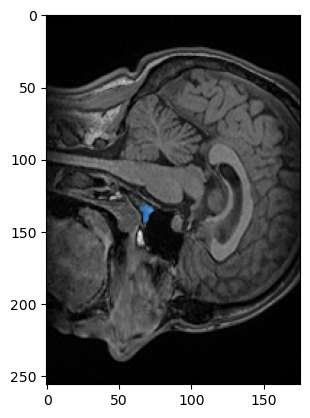

In [86]:
n = 86
plt.imshow(imgs[n,:,:],'gray')
show_mask(masks[n,:,:], plt.gca())

In [74]:
np.where(masks == 1)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [15]:
segmentor = Segmentor(model,x_center = 88, y_center = 100, z_center = 69)
masks, _ = segmentor.predict(imgs)
print(np.sum(masks)*0.001)

The model is running on cuda
0.53


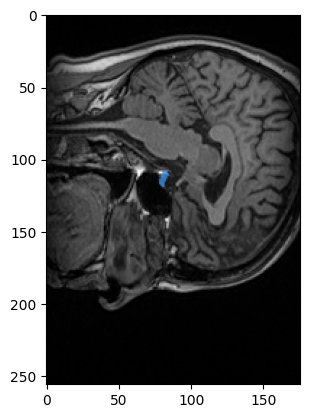

In [20]:
n = 90
plt.imshow(imgs[n,:,:],'gray')
show_mask(masks[n,:,:], plt.gca())

In [17]:
imgs.shape

(176, 256, 176)

## Implement model on NAKO data

In [364]:
model = load_model()
path = '../data/kopf_NAKO/images'
label_path = '../data/kopf_NAKO/labels'
files = os.listdir(path)
zz_nr = []
volumes = []
for file in tqdm(files):
    zz_nr.append(file[:6])
    data = nib.load(os.path.join(path, file))
    img = data.get_fdata()
    affine = data.affine
    t = threshold_otsu(img)
    x, y, z = np.where(img > t)
    x_center = (x.min()+x.max())/2
    y_center = (y.min()+y.max())/2
    z_center = (z.min()+z.max())/2
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center + 20, z_center = z_center)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * 0.001,3)
    if vol < 0.1:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center + 20, z_center = z_center + 14)
        masks, _ = segmentor.predict(img)
        vol = round(np.sum(masks) * 0.001,3)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'volumes': volumes,
    })
    df.to_csv('../data/kopf_NAKO/test.csv')
    nii_masks = nib.Nifti1Image(masks, affine)
    nib.save(nii_masks,os.path.join(label_path,file))
    

100%|██████████| 200/200 [02:21<00:00,  1.41it/s]


In [308]:
img.shape

(224, 256, 256)

In [309]:
z_center

np.float64(117.5)

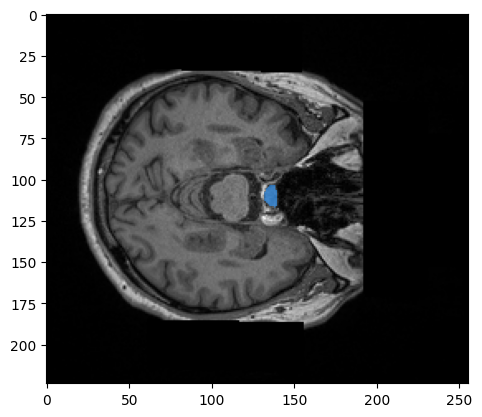

In [317]:
n = 128
plt.imshow(img[:,:,n],'gray')
show_mask(masks[:,:,n], plt.gca())

In [295]:
vol

np.float64(0.0)

In [384]:
file = '103978_30_T1_3D_SAG_sn23.nii.gz'
path = '../data/kopf_NAKO/images'
imgs = nib.load(os.path.join(path,file)).get_fdata()
t = threshold_otsu(imgs)
x, y, z = np.where(imgs > t)
x_center = int((x.min()+x.max())/2)
y_center = int((y.min()+y.max())/2)
z_center = int((z.min()+z.max())/2)
print(x_center, y_center, z_center)
model = load_model()
segmentor = Segmentor(model, x_center = x_center, y_center = y_center + 20, z_center = 130)
masks, _ = segmentor.predict(imgs)
print(np.sum(masks)*0.001)

122 113 118
0.163


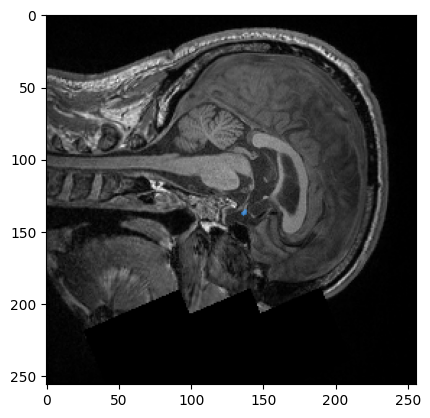

In [385]:
n = 111
plt.imshow(imgs[n,:,:],'gray')
show_mask(masks[n,:,:], plt.gca())

In [339]:
img.shape

(224, 256, 256)

# Thyroid gland segmentation 

In [1]:
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append('..')
from train.model import UNet3D
import os
from train.metrics import dice_score, iou_score, precision_score, recall_score
import numpy as np
import nibabel as nib
from tools.utils import show_mask
from thyseg.thyseg import load_model, Segmentor
import nibabel as nib
import pandas as pd
from tqdm import tqdm
from skimage.filters import threshold_otsu

In [3]:
ckpt = '../thyseg/checkpoints/thyseg_0.2.9.pt'
model = load_model(ckpt)
path = '../data/thyroids/SHIP_2025_100_D_T0'
files = os.listdir(path)
zz_nr = []
volumes = []
x_centers = []
y_centers = []
z_centers = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    x,y,z,_ = np.diag(data.affine)
    voxel = x * y * z
    img = data.get_fdata()
    t = threshold_otsu(img)
    z_center = img.shape[2] - 14
    xaxis, yaxis = np.where(img[:,:,z_center] > t)
    x_center = int((xaxis.min()+xaxis.max())/2)
    y_center = int(yaxis.max()-20)
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    if vol < 5:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks2, _ = segmentor.predict(img)
        vol2 = round(np.sum(masks2) * voxel * 0.001,3)
        if (vol2 > vol) and (vol2 > 0):
            vol = vol2
            final_x , final_y, final_z = np.where(masks2 == 1)
            x_center = (final_x.min()+final_x.max())/2
            y_center = (final_y.min()+final_y.max())/2
            z_center = (final_z.min()+final_z.max())/2
        elif vol2 == 0:
            pass
    else:
        final_x , final_y, final_z = np.where(masks == 1)
        x_center = (final_x.min()+final_x.max())/2
        y_center = (final_y.min()+final_y.max())/2
        z_center = (final_z.min()+final_z.max())/2
    x_centers.append(x_center)
    y_centers.append(y_center)
    z_centers.append(z_center)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'x_centers': x_centers,
        'y_centers': y_centers,
        'z_centers': z_centers,
        'volumes': volumes,
    })
    df.to_csv('../data/thyroids/thyvol_T0_new_pipeline.csv')

100%|██████████| 1690/1690 [05:00<00:00,  5.63it/s]


In [4]:
ckpt = '../thyseg/checkpoints/thyseg_0.2.9.pt'
model = load_model(ckpt)
path = '../data/thyroids/SHIP_2025_100_D_S2'
outpath = '../data/thyroids/low_volume'
files = os.listdir(path)
zz_nr = []
volumes = []
x_centers = []
y_centers = []
z_centers = []
for file in tqdm(files):
    zz_nr.append(file.replace('.nii.gz',''))
    data = nib.load(os.path.join(path, file))
    x,y,z,_ = np.diag(data.affine)
    voxel = x * y * z
    img = data.get_fdata()
    t = threshold_otsu(img)
    z_center = img.shape[2] - 14
    xaxis, yaxis = np.where(img[:,:,z_center] > t)
    x_center = int((xaxis.min()+xaxis.max())/2)
    y_center = int(yaxis.max()-20)
    segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center)
    masks, _ = segmentor.predict(img)
    vol = round(np.sum(masks) * voxel * 0.001,3)
    if vol < 5:
        segmentor = Segmentor(model, x_center = x_center, y_center = y_center, z_center = z_center - 30)
        masks2, _ = segmentor.predict(img)
        vol2 = round(np.sum(masks2) * voxel * 0.001,3)
        if (vol2 > vol) and (vol2 > 0):
            vol = vol2
            final_x , final_y, final_z = np.where(masks2 == 1)
            x_center = (final_x.min()+final_x.max())/2
            y_center = (final_y.min()+final_y.max())/2
            z_center = (final_z.min()+final_z.max())/2
        elif vol2 == 0:
            pass
    else:
        final_x , final_y, final_z = np.where(masks == 1)
        x_center = (final_x.min()+final_x.max())/2
        y_center = (final_y.min()+final_y.max())/2
        z_center = (final_z.min()+final_z.max())/2
    x_centers.append(x_center)
    y_centers.append(y_center)
    z_centers.append(z_center)
    volumes.append(vol)
    df = pd.DataFrame({
        'zz_nr': zz_nr,
        'x_centers': x_centers,
        'y_centers': y_centers,
        'z_centers': z_centers,
        'volumes': volumes,
    })
    df.to_csv('../data/thyroids/thyvol_S2_new_pipeline.csv')

100%|██████████| 752/752 [02:13<00:00,  5.65it/s]


In [11]:
img.shape

(256, 204, 47)

In [5]:
print(x, y, z)

1.7578125 1.7578125 6.0


In [6]:
data.affine

array([[6.       , 0.       , 0.       , 0.       ],
       [0.       , 1.7578125, 0.       , 0.       ],
       [0.       , 0.       , 1.7578125, 0.       ],
       [0.       , 0.       , 0.       , 1.       ]])

In [6]:
segmentor.z_center

40

In [19]:
img.shape

(256, 204, 60)

In [3]:
print(x,y,z)

1.40625 1.40625 6.0


In [14]:
masks.shape

(320, 260, 48)

In [21]:
np.sum(masks)
x, y, z = np.where(masks == 1)
print(x.max(), x.min())
print(y.max(), y.min())
print(z.max(), z.min())

167 142
128 104
42 28


In [2]:
img = nib.load("../data/thyroids/NAKO/100274_30.nii.gz").get_fdata()

In [3]:
img.shape

(320, 260, 48)

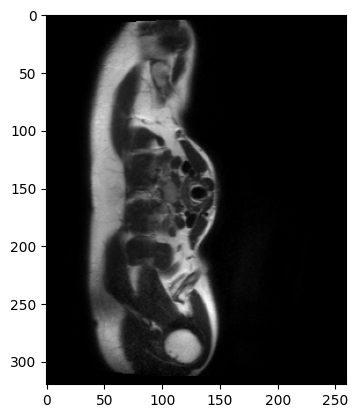

In [28]:
n = 43
plt.imshow(img[:,:,n],'gray')
show_mask(masks[:,:,n], plt.gca())

In [56]:
ckpt = '../thyseg/checkpoints/thyseg_0.2.9.pt'
model = load_model(ckpt)
file = '../data/thyroids/SHIP_2025_100_D_T0/2025500105025.nii.gz'
data = nib.load(file)
x,y,z,_ = np.diag(data.affine)
voxel = x * y * z
img = data.get_fdata()
t = threshold_otsu(img)
z_center = img.shape[2] - 14
xaxis, yaxis = np.where(img[:,:,z_center] > t)
x_center = int((xaxis.min()+xaxis.max())/2)
y_center = int(yaxis.max()-20)
print(x_center, y_center, z_center)
segmentor = Segmentor(model,x_center = x_center, y_center = y_center, z_center = z_center)
masks, _ = segmentor.predict(img)
vol = round(np.sum(masks) * voxel * 0.001,3)
print(vol)

128 106 46
19.188


In [57]:
img.shape

(256, 204, 60)

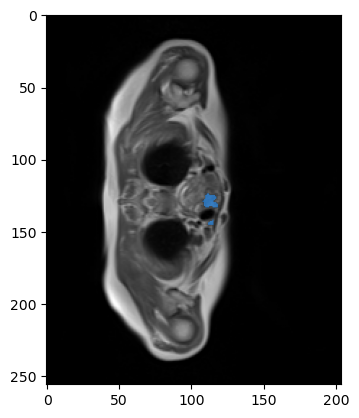

In [60]:
z = 45

plt.imshow(img[:,:,z],'gray')
show_mask(masks[:,:,z],plt.gca())